**Project Statement:**

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance.
6.	Identify the best model and justify the evaluation metrics used.
7.	Suggest various retention strategies for targeted employees.




# 1.	Perform data quality check by checking for missing values if any.

## 1.1 Data Preparation
- Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

- Load the data

In [2]:
data = pd.read_excel('1688640705_hr_comma_sep.xlsx')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


- Prepare the dataset

Get the information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Observation:**

There are no null objects.

In [4]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Descriptive analysis of data:

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- Renaming columns to suitable names

In [7]:
data = data.rename(columns={'sales' : 'department'})

#2.	Understand what factors contributed most to employee left by EDA.

##2.1. Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

###Correlation matrix and heatmap

In [8]:
data.drop(columns=['department','salary']).corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


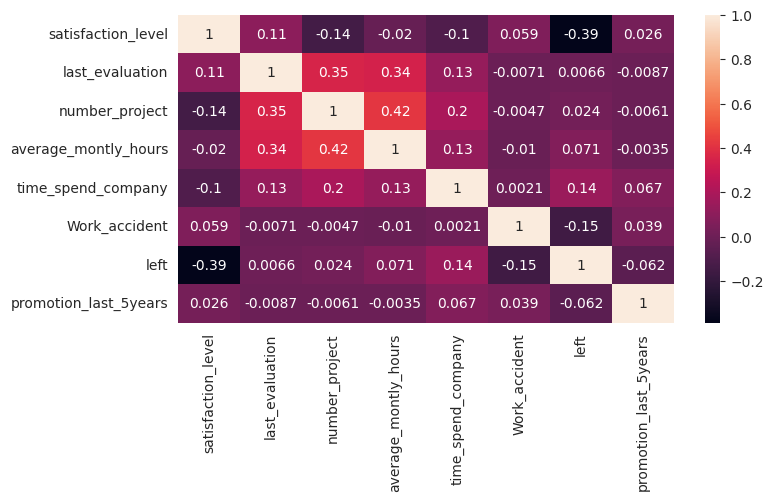

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(data.drop(columns=['department','salary']).corr(), cmap="rocket", annot=True)
plt.show()

**Obervations:**

**Moderately positive correalted features and their correlation values:**

|Feature1             |Feature2             |Correlation |
|---------------------|---------------------|------------|
|number_project       |average_monthly_hours|0.42        |
|number_project       |last_evaluation      |0.35        |
|average_monthly_hours|last_evaluation      |0.34        |

From this, we can conclude that top 3 features contributing to employee left are:
  - average_monthly_hours
  - number_project
  - last_evaluation

**Moderately Negative correalted features and their correlation values:**
- satisfaction_level and left: -0.39

|Feature1             |Feature2 |Correlation |
|---------------------|---------|------------|
|satisfaction_level   |left     |-0.39       |

This is obvious that less satisfied employees leave the company.

## 2.2 Draw the distribution plots
- Employee Satisfaction (use column satisfaction_level)
- Employee Evaluation (use column last_evaluation)
- Employee Average Monthly Hours (use column average_montly_hours)


In [10]:
# Function to plot feature relations
def plot_feature_relations(feature, rows, cols, plot_num, color, fontsize, title):
  plt.subplot(rows, cols, plot_num)
  sns.histplot(x=data[feature], kde = True, color=color)
  plt.title(title, fontweight='bold', fontsize=fontsize)
  plt.xlabel(feature, fontsize=fontsize)
  plt.ylabel('Employee Count', fontsize=fontsize)

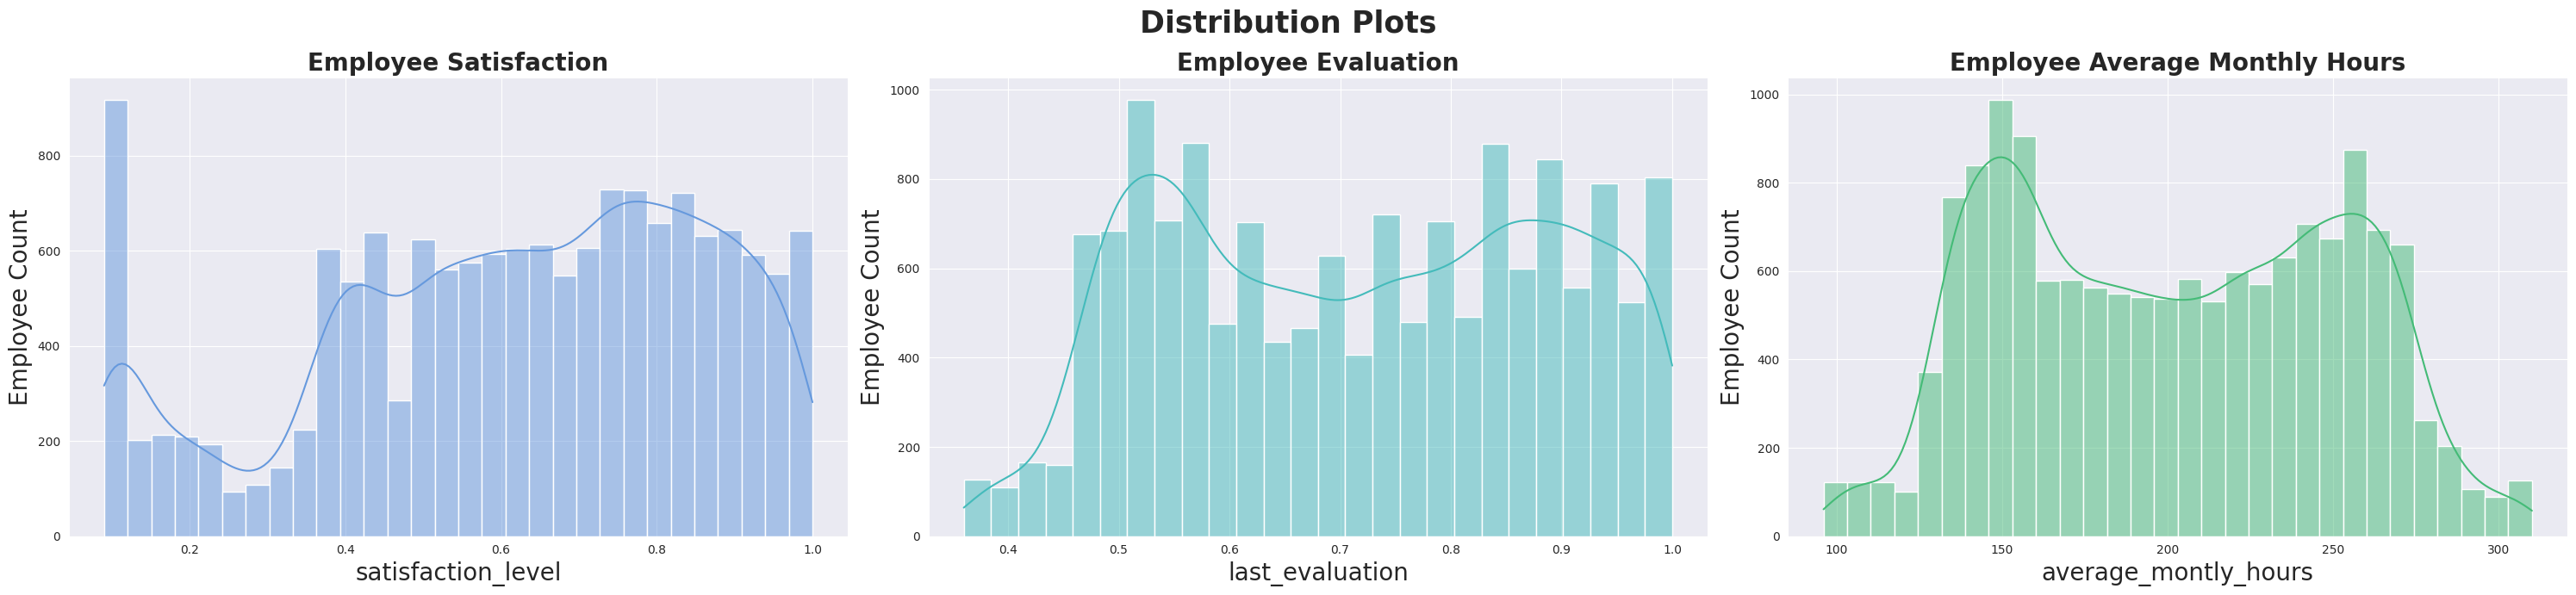

In [11]:
# Visualizations for positively correlated features

fig = plt.figure(figsize=(30, 7))
rows = 1
cols = 3
fontsize = 20

plot_feature_relations('satisfaction_level', rows, cols, 1, '#69D', fontsize, 'Employee Satisfaction')
plot_feature_relations('last_evaluation', rows, cols, 2, '#4BB', fontsize, 'Employee Evaluation')
plot_feature_relations('average_montly_hours', rows, cols, 3, '#4B7', fontsize, 'Employee Average Monthly Hours')

fig.suptitle("Distribution Plots", fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

**Observations:**

Distributions of different features are as follows:

| Feature              |      Distribution    |
|----------------------|----------------------|
| satisfaction_level   |Non-symmetric multimodel |
| last_evaluation      |Non-symmetric bimodel |
| average_monthly_hours|Non-symmetric bimodel |

## 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

In [12]:
data['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [13]:
group_sales_by_number_of_projects = data.groupby('department').left.value_counts()
group_sales_by_number_of_projects

department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: count, dtype: int64

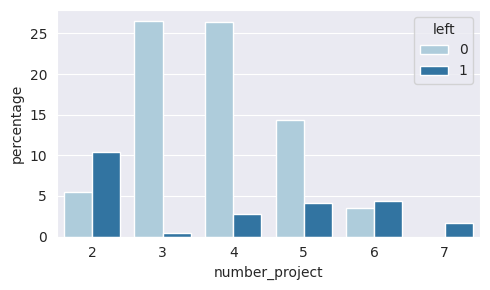

In [14]:
fig = plt.figure(figsize=(5, 3))
sns.barplot(x='number_project', y='number_project', data=data, hue='left', estimator=lambda x: len(x) / len(data) * 100, palette='Paired', errorbar=None)
plt.ylabel('percentage')
plt.tight_layout()

**Observations**

- More than half of the employees with 2,6, and 7 projects left the company
- Majority of the employees who did not leave the company had 3,4, and 5 projects
- All of the employees with 7 projects left the company
- There is an increase in employee turnover rate as project count increases

#3.	Perform clustering of Employees who left based on their satisfaction and evaluation
- Choose columns satisfaction_level, last_evaluation and left.
- Do KMeans clustering of employees who left the company into 3 clusters.
- Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


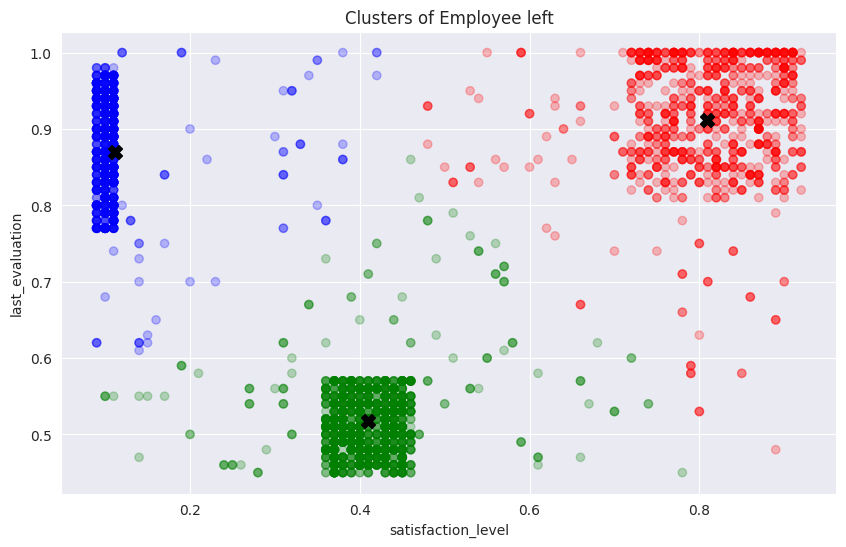

In [15]:
# Import kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=6)
kmeans.fit(data[data['left']==1][['satisfaction_level', 'last_evaluation']])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=data[data.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("satisfaction_level")
plt.ylabel("last_evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee left")
plt.show()

**Observations**

3 clusters in KMeans represent:
1. low satisfaction_level and high last_evaluation (blue)
2. medium satisfaction_level and low last_evaluation (green)
3. high satisfaction_level and high last_evaluation (red)

#4. Handle the left Class Imbalance using SMOTE technique.

In [16]:
data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

As we can see, there is imbalnce in left class with '0' and '1' having 11428 and 3571 samples respectively. This needs to be balanced. It can be achieved by SMOTE (Synthetic Minority Oversampling Technique).

##4.1 Pre-Process the data by converting categorical columns to numerical columns
- Separating categorical variables and numeric variables.
- Applying `get_dummies()` to the categorical variables.
- Combining categorical variables and numeric variables.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
print(f"Total number of categories in salary is {len(data['salary'].unique())} with the categories {data['salary'].unique()}")
print(f"Total number of categories in department is {len(data['department'].unique())} with the categories {data['department'].unique()}")

Total number of categories in salary is 3 with the categories ['low' 'medium' 'high']
Total number of categories in department is 10 with the categories ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


As there are only 3 unique values in `salary`, one hot encoding can be used.

There are 10 unique values in `department`, label encoding can be used.

In [19]:
salary = pd.get_dummies(data=data['salary'], drop_first=True, prefix='sal', dtype='int64')
salary.head()

,sal_low,sal_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [20]:
department = pd.get_dummies(data=data['department'], drop_first=True, prefix='dep', dtype='int64')
department.head()

,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [21]:
data.drop(['salary', 'department'], axis=1, inplace=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [22]:
data = pd.concat([data, salary, department], axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sal_low,sal_medium,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sal_low                14999 non-null  int64  
 9   sal_medium             14999 non-null  int64  
 10  dep_RandD              14999 non-null  int64  
 11  dep_accounting         14999 non-null  int64  
 12  dep_hr                 14999 non-null  int64  
 13  dep_management         14999 non-null  int64  
 14  dep_marketing          14999 non-null  int64  
 15  de

Now all the data is numeric as it can be seen from the above.

## 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['left'])
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [25]:
print(f"{'Training samples':20s} {':':5s} {len(X_train)}")
print(f"{'Testing samples':20s} {':':5s} {len(X_test)}")

Training samples     :     11999
Testing samples      :     3000


##4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
sm = SMOTE(random_state=123)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [28]:
from collections import Counter
print(f"{'Original dataset shape':30s} {':':5s} {Counter(y_train)}")
print(f"{'Resampled dataset shape':30s} {':':5s} {Counter(y_train_SMOTE)}")

Original dataset shape         :     Counter({0: 9142, 1: 2857})
Resampled dataset shape        :     Counter({0: 9142, 1: 9142})


**Observation**
- Before SMOTE, number of samples in classes `0` and `1` are `9142` and `2857` respectively.
- After upsampling using SMOTE, number of samples in classes `0` and `1` are `9142` and `9142` respectively.

Now, data is balanced.

#5.	Perform 5-Fold cross-validation model training and evaluate performance

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

##5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

In [31]:
log_reg = LogisticRegression(max_iter=500, random_state= 123)
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring="accuracy")
print(f'Scores for each fold are: {log_reg_score}')
print(f'Average score: {"{:.2f}".format(log_reg_score.mean())}')

Scores for each fold are: [0.79166667 0.79333333 0.80333333 0.79416667 0.78574406]
Average score: 0.79


In [32]:
log_reg.fit(X_train, y_train)
log_reg_predicted = log_reg.predict(X_test)
print("Classification Report for Logistic Regression Model")
print("===================================================")
print("\n" + classification_report(y_test, log_reg_predicted))

Classification Report for Logistic Regression Model

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2286
           1       0.59      0.36      0.45       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



##5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report

In [33]:
random_forest = RandomForestClassifier(random_state= 123)
random_forest_score = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring="accuracy")
print(f'Scores for each fold are: {random_forest_score}')
print(f'Average score: {"{:.2f}".format(random_forest_score.mean())}')

Scores for each fold are: [0.9875     0.98666667 0.98958333 0.98583333 0.98832847]
Average score: 0.99


In [34]:
random_forest.fit(X_train, y_train)
random_forest_predicted = random_forest.predict(X_test)
print("Classification Report for Random Forest Classifier")
print("==================================================")
print("\n" + classification_report(y_test, random_forest_predicted))

Classification Report for Random Forest Classifier

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



##5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [35]:
gradient_boost = GradientBoostingClassifier(random_state= 123)
gradient_boost_score = cross_val_score(gradient_boost, X_train, y_train, cv=kfold, scoring="accuracy")
print(f'Scores for each fold are: {gradient_boost_score}')
print(f'Average score: {"{:.2f}".format(gradient_boost_score.mean())}')

Scores for each fold are: [0.97333333 0.975      0.9775     0.97791667 0.97707378]
Average score: 0.98


In [36]:
gradient_boost.fit(X_train, y_train)
gradient_boost_predicted = gradient_boost.predict(X_test)
print("Classification Report for Gradient Boosting Classifier")
print("======================================================")
print("\n" + classification_report(y_test, gradient_boost_predicted))

Classification Report for Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



**Observation:**

From the above classification reports, it can be obsevered that `Random Forest Classifier` outperforms the remaining two (`Logistic Regression Classifier` and `Gradient Boosting Calssifier`).

#6. Identify the best model and justify the evaluation metrics used.

##6.1 Find the ROC/AUC for each model and plot the ROC curve

In [37]:
from sklearn.metrics import roc_auc_score

log_reg_roc_auc = roc_auc_score(y_test, log_reg_predicted)

random_forest_roc_auc = roc_auc_score(y_test, random_forest_predicted)

gradient_boost_roc_auc = roc_auc_score(y_test, gradient_boost_predicted)

print('Area Under Curve (ROC) for all Classifiers:')
print('===========================================')
print(f"{'Logistic Regression ':30s} {':':10s} {log_reg_roc_auc:1.2f}")
print(f"{'Random Forest Classifier ':30s} {':':10s} {random_forest_roc_auc:1.2f}")
print(f"{'Gradient Boosting Classifier ':30s} {':':10s} {gradient_boost_roc_auc:1.2f}")


Area Under Curve (ROC) for all Classifiers:
Logistic Regression            :          0.64
Random Forest Classifier       :          0.99
Gradient Boosting Classifier   :          0.96


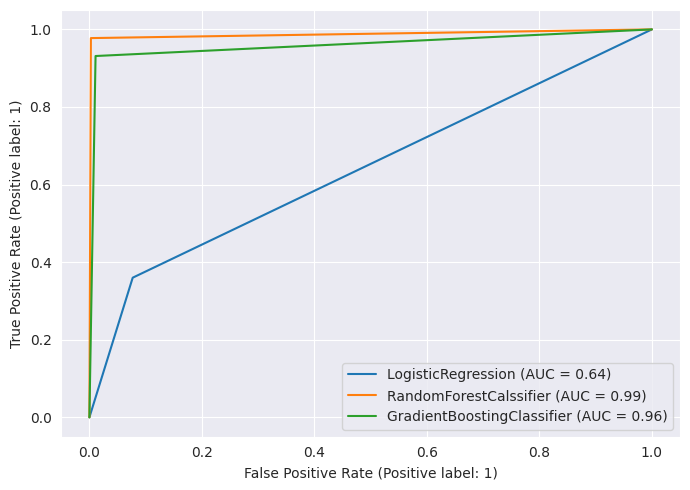

In [38]:
from sklearn.metrics import RocCurveDisplay

f, axes = plt.subplots(1, 1, figsize = (7, 5))

RocCurveDisplay.from_predictions(y_test, log_reg_predicted, name='LogisticRegression', ax=axes)
RocCurveDisplay.from_predictions(y_test, random_forest_predicted, name='RandomForestCalssifier', ax=axes)
RocCurveDisplay.from_predictions(y_test, gradient_boost_predicted, name='GradientBoostingClassifier', ax=axes)

f.tight_layout()
plt.show()

**Observation:**

Area under the curve is the highest for `Random Forest Classifier`.

---

##6.2. Find the confusion matrix for each of the models.

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg_confusion_mat = confusion_matrix(y_test, log_reg_predicted)
random_forest_confusion_mat = confusion_matrix(y_test, random_forest_predicted)
gradient_boost_confusion_mat = confusion_matrix(y_test, gradient_boost_predicted)

print("Confusion Matrices:")
print("===================")

print('\nLogistic Regression:')
print('--------------------')
print(log_reg_confusion_mat)

print('\nRandom Forest Classifier:')
print('-------------------------')
print(random_forest_confusion_mat)

print('\nGradient Boost Classifier:')
print('--------------------------')
print(gradient_boost_confusion_mat)

Confusion Matrices:

Logistic Regression:
--------------------
[[2110  176]
 [ 457  257]]

Random Forest Classifier:
-------------------------
[[2280    6]
 [  16  698]]

Gradient Boost Classifier:
--------------------------
[[2261   25]
 [  49  665]]


##6.3. From the confusion matrix, explain which metric needs to be used- Recall or Precision?

Precision is about minimizing the number of false positives, while recall is about maximizing the number of true positives.

In this case, we need to minimize the number of false positives. Therefore, precision can be used.

#7.	Suggest various retention strategies for targeted employees

The best model as evaluated in previous sections is `Random Forest Classifier`. Therfore, `Random Forest Classifier` is used for predictions

##7.1. Using the best model, predict the probability of employee turnover in the test data.

In [40]:
random_forest_predicted_proba = random_forest.predict_proba(X_test)
employee_turnover_prob = random_forest_predicted_proba[:,0]

##7.2. Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)

■	Medium Risk Zone (Orange) (60% < Score < 90%)

■	High Risk Zone (Red) (Score > 90%).

In [41]:
risk_zones = ['Safe Zone (>20%)', 'Low Risk Zone\n(>=20%, <60%)', 'Medium Risk Zone\n(>=60%, <90%)', 'High Risk Zone\n(>90%)']
risk_zones

['Safe Zone (>20%)',
 'Low Risk Zone\n(>=20%, <60%)',
 'Medium Risk Zone\n(>=60%, <90%)',
 'High Risk Zone\n(>90%)']

In [42]:
safe_zone = employee_turnover_prob[np.where(employee_turnover_prob < 0.2)]
low_risk_zone = employee_turnover_prob[np.where((employee_turnover_prob >= 0.2) & (employee_turnover_prob < 0.6))]
medium_risk_zone = employee_turnover_prob[np.where((employee_turnover_prob >= 0.6) & (employee_turnover_prob < 0.9))]
high_risk_zone = employee_turnover_prob[np.where(employee_turnover_prob > 0.9)]

In [43]:
zone_count = [len(safe_zone), len(low_risk_zone), len(medium_risk_zone), len(high_risk_zone)]
zone_count

[666, 44, 143, 2122]

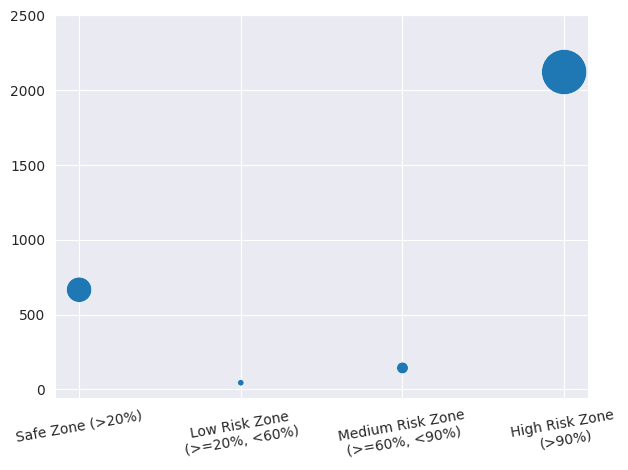

In [44]:
ax = sns.scatterplot(x=risk_zones, y=zone_count, s=[float(i)*0.5 for i in zone_count])
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

**Conclusion**

Number of employees according to the zones:

|Zone       |Employee Count|
|-----------|--------------|
|Safe       |666           |
|Low risk   |44            |
|Medium risk|143           |
|High risk  |2122          |

There are more employees in `high risk` zone.

Employee count is as follows:

`high risk` > `safe zone` > `medium risk` > `low risk`

There should be more focus on retaining high risk zone as more employees are in this zone.

**Strategies to retain high risk zones:**
- Offer more competitive pay
- Provide advancement opportunities
- Recognition and reward systems
- Appreciation
- Flexible working hours
- Ask for feedback
- Support employee well-being
- Offer company stocks
- Better company culture

**Strategies to retain medium risk zones:**
- Mentorship programs
- Reassess compensation
- Emphasis on team work
- Encourage employee creativity
- Build employee enagagement

**Strategies to retain low risk zones:**
- Offer training
- Reassess compensation

